No notebook anterior, nós aprendemos intuitivamente como o perceptron aprende. De maneira geral, nós vamos atualizando os pesos e o bias sempre buscando diminuir uma função de custo. Nesse notebook, nós vamos ver como esse aprendizado realmente acontence, tanto na teoria quanto na prática. Também utilizaremos o Perceptron para resolver problemas de classificação e regressão.

__Objetivos__:

- Implementar o perceptron e seu modelo de aprendizado em Python puro e Numpy
- Utilizar o perceptron para regressão e classificação

# Sumário

[Introdução](#Introdução)
- [Regra de Aprendizado do Perceptron](#Regra-de-Aprendizado-do-Perceptron)
- [Pseudo-algoritmo do Perceptron](#Pseudo-algoritmo-do-Perceptron)

[Classificação](#Classificação)
- [Porta AND/OR](#Porta-AND/OR)
- [Exercício de Classificação](#Exerc%C3%ADcio-de-Classificação)

[Regressão](#Regressão)
- [Exercício de Regressão](#Exerc%C3%ADcio-de-Regressão)

[Referências](#Referências)

# Imports e Configurações

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from random import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets.samples_generator import make_blobs

%matplotlib inline

# Introdução

O tipo mais básico de Rede Neural Artificial é formada por apenas um neurônio, o __Perceptron__. Inicialmente, o Perceptron foi projetado para ser um __classificador binário linear__ responsável por mapear uma ou mais entradas em uma saída desejada. Porém, também podemos utilizá-lo para resolver problemas de __regressão linear__. Ele foi projetado em 1957 por Frank Rosenblatt.

O perceptron é formado por:

<img src='images/perceptron.png' width='350'>

- __entradas__ $x_1,...,x_D$: representam os atributos dos seus dados com dimensionalidade $D$. O Perceptron aceita qualquer tamanho de entrada, porém a saída é sempre apenas um valor.
- __junção aditiva__ $\sum$: também chamada de _função agregadora_, nada mais é que a soma ponderada das entradas com os __pesos__ ($w_1,...,w_D)$. Em geral, o resultado é somado com um __bias__ $b$, responsável por deslocar o resultado do somatório. A junção aditiva é descrita pela seguinte fórmula:

$$\sum_i^D{x_iw_i} + b$$

- __função de ativação__ $f$: utilizada para mapear o resultado da junção aditiva em uma saída esperada. Mais detalhes abaixo.

Logo, o Perceptron é representado pela seguinte fórmula matemática:

$$\widehat{y}_i = f(\sum_i^D{x_iw_i} + b)$$

Onde:

- $D$: representa a dimensionalidade das amostras, ou seja, a quantidade de atributos de cada amostra.
- $x_i$: representam os atributos de uma amostra que servem de entrada para o Perceptron.
- $w_i$: representam os __pesos sinápticos__ que ponderam as entradas.
- $b$: representa o __bias__, responsável por deslocar a fronteira de decisão além da origem e não depende de nenhum valor de entrada. Repare que o bias encontra-se fora do somatório.
- $f$: __função de ativação__. Quando a função de ativação é linear, ou seja, nenhuma transformação é aplicada no resultado da junção aditiva, o Perceptron atua como um __Regressor Linear__. Se precisamos efetuar uma __Classificação binária__, devemos utilizar a função _step_ (também conhecida como _função degrau_) para mapear a saída em um valor discreto (0 ou 1):

$$f = \begin{cases}1 & se \ wx+b > 0\\0 & caso \ contr\acute ario\end{cases}$$

- $\widehat{y}$: representa a saída do Perceptron (o valor predito).

__Observações importantes__:

- O Perceptron não faz __Classificação Multiclasse__.
- __A atualização dos pesos é *online*, ou seja, efetuada amostra a amostra__ utilizando uma fórmula pré-definida que veremos na seção a seguir.

## Regra de Aprendizado do Perceptron

O Perceptron tem sua própria forma de aprendizado conforme definido no seu artigo original. Na verdade, a fórmula para atualização dos pesos e bias é bem simples:

$$w_i = w_i + \lambda(y_i - \widehat{y}_i)x_i$$
<br>
$$b_i = b_i + \lambda(y_i - \widehat{y}_i)$$

Onde $\lambda$ é a __taxa de aprendizagem__.

Repare que $y_i - \widehat{y}_i$ significa calcular a diferença entre o valor esperado ($y_i$) e o valor predito ($\widehat{y}_i$). Supondo que estamos fazendo __classificação binária__ de uma amostra $(x_i, y_i)$. Nesse caso, teremos duas possibilidades:
- __O valor esperado é $y_i = \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __igual__ a saída esperada. Nesse caso, __a diferença $y_i - \widehat{y}_i = 0$ e não haverá atualização de pesos__.
- __O valor esperado é $y_i \neq \widehat{y}_i$__, ou seja, a saída do Perceptron (após a função de ativação _step_) é __diferente__ da saída esperada. Nesse caso, __a atualização dos pesos será dada pela diferença $y_i - \widehat{y}_i$__. Repare que:
    - quando essa diferença é __negativa__ (ou seja, $y_i = 0$ e $\widehat{y}_i = 1$), __os pesos tendem a diminuir__.
    - quando essa diferença é __positiva__ (ou seja, $y_i = 1$ e $\widehat{y}_i = 0$), __os pesos tendem a aumentar__.

## Pseudo-algoritmo do Perceptron

1. Inicialize os pesos $w_i$ e o bias $b$
2. Para cada amostra $(x_i, y_i)$ do nosso banco:
    1. Calcule $\widehat{y}_i = f(\sum_i^D{x_iw_i} + b)$, onde $f$ é a __função _step_ para classificação__ e __linear no caso da regressão__
    2. Calcule o $erro = y_i - \widehat{y}_i$
    3. Atualize os pesos $w_i = w_i + \lambda*erro*x_i$
    4. Atualize o bias $b_i = b_i + \lambda*erro$
3. Repita o passo 2 por N vezes ou até que alguma medida de custo para o $erro$ seja menor que um valor pré-determinado.
    
Repare, como dito lá em cima, que __a atualização dos pesos e bias é feito a cada amostra__, e não somente após ver todas as amostras do banco.

# Classificação

## Porta AND/OR

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
#y = np.array([0, 1, 1, 1]) # porta OR
y = np.array([[0, 0, 0, 1]]).T # porta AND

print(x.shape, y.shape)

(4, 2) (4, 1)


### Python

In [3]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(101):
    cost = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([x_i[d]*w[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%10 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(x, np.array(w))+b))

step 0: [3]
step 10: [3]
step 20: [2]
step 30: [3]
step 40: [3]
step 50: [2]
step 60: [3]
step 70: [3]
step 80: [2]
step 90: [3]
step 100: [3]
w:  [array([-0.22244309]), array([-0.22295296])]
b:  [ 0.23190474]
y_pred: [[ 0.23190474]
 [ 0.00895178]
 [ 0.00946165]
 [-0.21349131]]


### Numpy

In [4]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(100):
    cost = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        cost += error**2
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)
print('y_pred: {0}'.format(np.dot(w, x.T)+b))

step 0: [[1]]
step 10: [[2]]
step 20: [[2]]
step 30: [[2]]
step 40: [[2]]
step 50: [[2]]
step 60: [[2]]
step 70: [[2]]
step 80: [[1]]
step 90: [[0]]
w:  [[ 0.02071187  0.00976517]]
b:  [[-0.02384817]]
y_pred: [[-0.02384817 -0.014083   -0.0031363   0.00662887]]


## Exercício de Classificação

(100, 2) (100, 1)


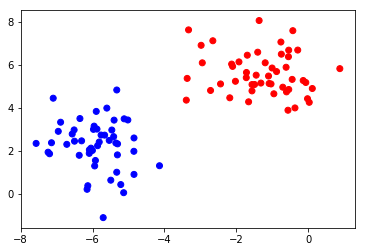

In [5]:
x, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=1234)
y = y.reshape(-1, 1)

print(x.shape, y.shape)
plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

In [6]:
def plot_linear_classifier(x, y, w, b):
    x1_min, x1_max = x[:,0].min(), x[:,0].max()
    x2_min, x2_max = x[:,1].min(), x[:,1].max()

    x1, x2 = np.meshgrid(np.linspace(x1_min-1, x1_max+1,100), np.linspace(x2_min-1, x2_max+1, 100))
    x_mesh = np.array([x1.ravel(), x2.ravel()]).T

    plt.scatter(x[:,0], x[:,1], c=y, cmap='bwr')

    y_mesh = np.dot(x_mesh, w.T) + b
    y_mesh = np.where(y_mesh <= 0, 0, 1)

    plt.contourf(x1, x2, y_mesh.reshape(x1.shape), cmap='bwr', alpha=0.5)
    plt.xlim(x1_min-1, x1_max+1)
    plt.ylim(x2_min-1, x2_max+1)

### Python

step 0: 14
step 100: 0
step 200: 0
step 300: 0
step 400: 0
step 500: 0
step 600: 0
step 700: 0
step 800: 0
step 900: 0
step 1000: 0
w:  [0.10743923981773533, 0.22972588269418454]
b:  -0.587671078307


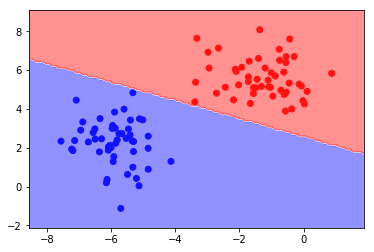

In [7]:
D = x.shape[1]
w = [2*random() - 1 for i in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(1001):
    cost = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([w[d]*x_i[d] for d in range(D)]) + b
        y_pred = 1 if y_pred > 0 else 0
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, np.array(w), b)

### Numpy

step 0: [[24]]
step 10: [[0]]
step 20: [[0]]
step 30: [[0]]
step 40: [[0]]
step 50: [[0]]
w:  [[ 0.12746055  0.16596336]]
b:  [[-0.20269664]]


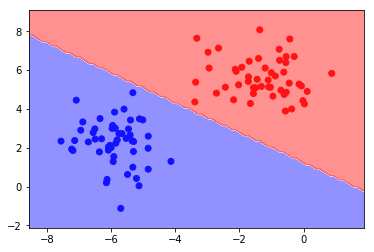

In [8]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(51):
    cost = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        y_pred = np.where(y_pred > 0, 1, 0)
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        cost += error**2
    
    if step%10 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

plot_linear_classifier(x, y, w, b)

# Regressão 

Para transformar o Perceptron em um __regressor linear__, só o que temos de fazer é __remover a função de ativação _step___, transformando-a em uma função de ativação linear.

Apesar dessa modificação, __a fórmula de atualização dos pesos não sofre nenhuma alteração__. 

Vamos, então, implementar nosso perceptron para classificação em Python, Numpy, Keras e TensorFlow:

In [9]:
df = pd.read_csv('data/medidas.csv')
print(df.shape)
df.head(10)

(100, 2)


,Altura,Peso
0,187,109.72
1,177,91.09
2,180,88.93
3,177,89.39
4,177,92.02
5,183,94.70
6,178,83.57
7,177,85.19
8,183,92.96
9,188,108.21


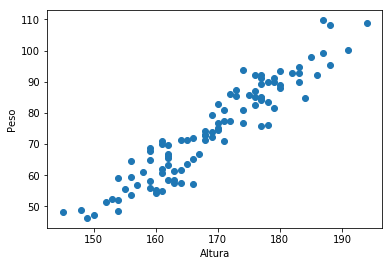

In [10]:
x = df.Altura.values
y = df.Peso.values

plt.figure()
plt.scatter(x, y)
plt.xlabel('Altura')
plt.ylabel('Peso')

In [11]:
print(x.shape, y.shape)

(100,) (100,)


In [12]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

print(x.shape, y.shape)

(100, 1) (100, 1)


### Python

__Exercício__: tentar estimar as learning_rates de __w__ e __b__. Elas são diferentes por que nossos dados não estão na mesma escala!

In [13]:
D = x.shape[1]
w = 2*random() - 1 # [1xD]
b = 2*random() - 1 # [1x1]

for step in range(10001):
    cost = 0
    for x_i, y_i in zip(x, y):
        y_pred = x_i*w + b
        error = y_i[0] - y_pred
        w = w + 1e-7*error*x_i
        b = b + 1e-2*error
        cost += error**2

    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: [ 143853.3760922]
step 1000: [ 3421.84137733]
step 2000: [ 2761.45051082]
step 3000: [ 2647.86062362]
step 4000: [ 2628.99286616]
step 5000: [ 2626.14678182]
step 6000: [ 2625.8455683]
step 7000: [ 2625.87644766]
step 8000: [ 2625.91710371]
step 9000: [ 2625.93904242]
step 10000: [ 2625.94910785]
w:  [ 1.36988005]
b:  [-157.89486272]


### Numpy 

In [14]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

for step in range(10001):
    cost = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        error = y_i - y_pred 
        w = w + 1e-7*np.dot(error.T, x_i)
        b = b + 1e-2*error
        cost += error**2
    
    if step%1000 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: [[ 151158.37677916]]
step 1000: [[ 3418.25240028]]
step 2000: [[ 2760.82888567]]
step 3000: [[ 2647.75551875]]
step 4000: [[ 2628.97618853]]
step 5000: [[ 2626.14461345]]
step 6000: [[ 2625.84550898]]
step 7000: [[ 2625.87657257]]
step 8000: [[ 2625.9171825]]
step 9000: [[ 2625.93908013]]
step 10000: [[ 2625.94912449]]
w:  [[ 1.3698803]]
b:  [[-157.89490331]]


### Numpy com Pré-processamento

In [15]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

print(x.min(), x.max())

-1.0 1.0


In [16]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[ 33.60164767]]
b:  [ 74.99636287]


In [17]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1 # [1xD]
b = 2*np.random.random()-1       # [1x1]

learning_rate = 1e-3

for step in range(1001):
    cost = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        cost += error**2
    
    if step%100 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: [[ 526215.41140646]]
step 100: [[ 3154.86326668]]
step 200: [[ 2624.16057881]]
step 300: [[ 2611.552872]]
step 400: [[ 2611.25196916]]
step 500: [[ 2611.24457984]]
step 600: [[ 2611.24436653]]
step 700: [[ 2611.24435563]]
step 800: [[ 2611.24435447]]
step 900: [[ 2611.2443543]]
step 1000: [[ 2611.24435428]]
w:  [[ 33.60180844]]
b:  [[ 74.93896427]]


## Exercício de Regressão

In [18]:
df = pd.read_csv('data/notas.csv')

print(df.shape)
df.head(10)

(25, 4)


,prova1,prova2,prova3,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


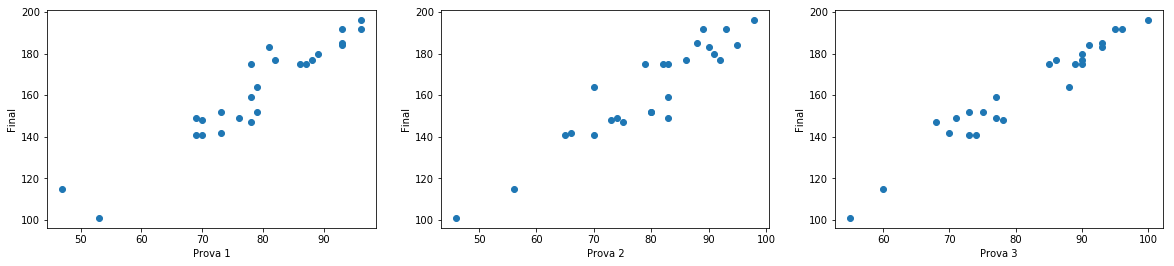

In [19]:
plt.figure(figsize=(20, 4))

plt.subplot(1, 3, 1)
plt.scatter(df.prova1.values, df.final.values)
plt.xlabel('Prova 1')
plt.ylabel('Final')

plt.subplot(1, 3, 2)
plt.scatter(df.prova2.values, df.final.values)
plt.xlabel('Prova 2')
plt.ylabel('Final')

plt.subplot(1, 3, 3)
plt.scatter(df.prova3.values, df.final.values)
plt.xlabel('Prova 3')
plt.ylabel('Final')

In [20]:
x = df[['prova1', 'prova2', 'prova3']].values
y = df['final'].values.reshape(-1, 1)

print(x.shape, y.shape)

(25, 3) (25, 1)


In [21]:
minmax = MinMaxScaler(feature_range=(-1,1))
x = minmax.fit_transform(x.astype(np.float64))

In [22]:
reg = LinearRegression()
reg.fit(x,y)

print('w: ', reg.coef_)
print('b: ', reg.intercept_)

w:  [[  8.72048636  14.1054877   26.26749487]]
b:  [ 150.65175754]


### Python

In [23]:
D = x.shape[1]
w = [2*random() - 1 for d in range(D)] # [1xD]
b = 2*random() - 1 # [1x1]

learning_rate = 1e-2

for step in range(2001):
    cost = 0
    for x_i, y_i in zip(x, y):
        y_pred = sum([x_i[d]*w[d] for d in range(D)]) + b
        error = y_i[0] - y_pred
        w = [w[d] + learning_rate*error*x_i[d] for d in range(D)]
        b = b + learning_rate*error
        cost += error**2
        
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))

print('w: ', w)
print('b: ', b)

step 0: 498861.91004933394
step 200: 176.06403236542494
step 400: 148.5407207373154
step 600: 146.42035167905058
step 800: 146.18356246405793
step 1000: 146.15456867911627
step 1200: 146.15106511637717
step 1400: 146.15068431604848
step 1600: 146.15065953488633
step 1800: 146.1506649150084
step 2000: 146.1506686606509
w:  [8.725212271533497, 14.139477578177058, 26.320504782708674]
b:  150.711192626


### Numpy

In [24]:
D = x.shape[1]
w = 2*np.random.random((1, D))-1
b = 2*np.random.random()-1       

learning_rate = 1e-2

for step in range(2001):
    cost = 0
    for x_i, y_i in zip(x, y):
        x_i = x_i.reshape(1, D)
        y_pred = np.dot(x_i, w.T) + b 
        error = y_i - y_pred
        w = w + learning_rate*np.dot(error.T, x_i)
        b = b + learning_rate*error
        cost += error**2
    
    if step%200 == 0:
        print('step {0}: {1}'.format(step, cost))
    
print('w: ', w)
print('b: ', b)

step 0: [[ 504513.24851052]]
step 200: [[ 177.77441956]]
step 400: [[ 148.67574459]]
step 600: [[ 146.43559158]]
step 800: [[ 146.18544407]]
step 1000: [[ 146.15480037]]
step 1200: [[ 146.15109187]]
step 1400: [[ 146.15068671]]
step 1600: [[ 146.15065947]]
step 1800: [[ 146.15066478]]
step 2000: [[ 146.1506686]]
w:  [[  8.72522411  14.13946992  26.32050026]]
b:  [[ 150.711192]]


# Referências

- [Artigo original do Perceptron](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.335.3398&rep=rep1&type=pdf)